In [3]:
#Importing Necessary Libaries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [10]:
directory = r'D:\datasets\dataset\dataset\img'

In [11]:
#loading data from the disk
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,  batch_size=32, image_size=(256,
    256), shuffle=True
)

Found 91438 files belonging to 13 classes.


In [12]:
class_names = dataset.class_names

In [13]:
class_names

['ks01',
 'ks02',
 'ks03',
 'ks04',
 'ks10',
 'ks13',
 'ks15',
 'ks24',
 'ks27',
 'ks55',
 'ks7',
 'ks8',
 'ks9']

In [8]:
len(class_names)

10

In [9]:
len(dataset)

501

In [ ]:
501*32

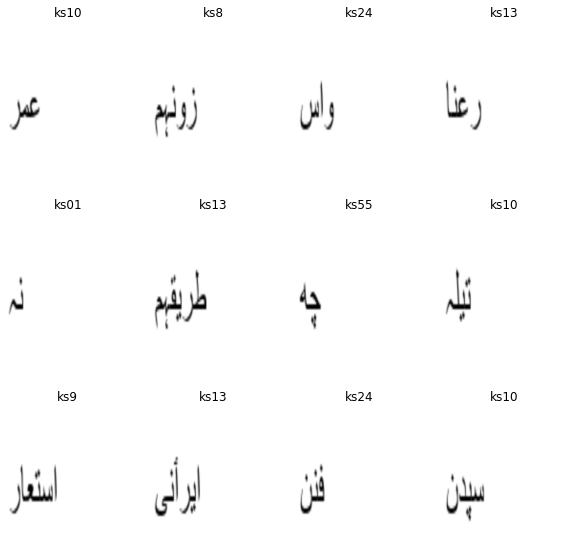

In [15]:
#Displaying sample  images
plt.figure(figsize=(10,10))
for image_batch,label in dataset.take(1):   
    for i in range(12):
          axes = plt.subplot(3,4,(i+1))
          plt.imshow(image_batch[i].numpy().astype('uint8'))
          plt.title(class_names[label[i].numpy()])
          plt.axis(False)
    #print(image_batch[0])
    #print(label.numpy())

# Spliting dataset into tarining,validation,test

In [8]:
def train_test_split(ds,val_ds=.1,train_split=0.8,val_split=0.1,test_split=0.1):
    train_size = int(len(ds)*train_split)
    val_size   = int(len(ds)*val_split)
    train_ds = ds.take(train_size)
    val_ds   = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [9]:
train_ds,val_ds,test_ds= train_test_split(dataset)

In [13]:
len(val_ds)

50

In [10]:
#reszing and Rescaling
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [11]:
#DataAugementation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
#Defining the model 
input_shape = (32,256,256,3)
model = models.Sequential(
    [
        resize_and_rescale,
        data_augmentation,
        layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(len(class_names), activation='softmax')
        
        ]
)
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [13]:
#Compiling The Model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
BATCH_SIZE=32

In [15]:
#Training
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
400/400 [==============================] - 42s 85ms/step - loss: 1.4776 - accuracy: 0.4842 - val_loss: 1.1804 - val_accuracy: 0.5938
Epoch 2/50
400/400 [==============================] - 33s 83ms/step - loss: 0.8968 - accuracy: 0.6874 - val_loss: 0.7276 - val_accuracy: 0.7294
Epoch 3/50
400/400 [==============================] - 34s 84ms/step - loss: 0.6699 - accuracy: 0.7655 - val_loss: 0.7686 - val_accuracy: 0.7125
Epoch 4/50
400/400 [==============================] - 34s 85ms/step - loss: 0.5352 - accuracy: 0.8148 - val_loss: 0.5555 - val_accuracy: 0.7962
Epoch 5/50
400/400 [==============================] - 36s 89ms/step - loss: 0.4213 - accuracy: 0.8495 - val_loss: 0.5971 - val_accuracy: 0.7906
Epoch 6/50
400/400 [==============================] - 35s 87ms/step - loss: 0.3840 - accuracy: 0.8673 - val_loss: 0.3368 - val_accuracy: 0.8763
Epoch 7/50
400/400 [==============================] - 35s 87ms/step - loss: 0.3186 - accuracy: 0.8844 - val_loss: 0.3965 - val_accuracy:

In [ ]:
print(tf.config.list_physical_devices('GPU'))

In [16]:
scores=model.evaluate(test_ds)

51/51 [==============================] - 9s 38ms/step - loss: 0.1552 - accuracy: 0.9510


In [23]:
scores

[0.1529596596956253, 0.9503414034843445]

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
history.history['accuracy']

[0.43187499046325684,
 0.6725780963897705,
 0.7808593511581421,
 0.8262500166893005,
 0.8481249809265137,
 0.8705468773841858,
 0.8887500166893005,
 0.9003124833106995,
 0.9048437476158142,
 0.9136718511581421,
 0.9166406393051147,
 0.9266406297683716,
 0.9345312714576721,
 0.9330468773841858,
 0.9370312690734863,
 0.9430468678474426,
 0.9430468678474426,
 0.9505468606948853,
 0.9473437666893005,
 0.944140613079071,
 0.9536718726158142,
 0.957812488079071,
 0.9534375071525574,
 0.9589062333106995,
 0.9615625143051147,
 0.9575781226158142,
 0.9607812762260437,
 0.9617968797683716,
 0.9616405963897705,
 0.9624218940734863,
 0.9604687690734863,
 0.9612500071525574,
 0.9653906226158142,
 0.9642968773841858,
 0.9700781106948853,
 0.9682812690734863,
 0.9682812690734863,
 0.966796875,
 0.9721875190734863,
 0.9685937762260437,
 0.9683593511581421,
 0.9701562523841858,
 0.9701562523841858,
 0.9742187261581421,
 0.9728906154632568,
 0.9775000214576721,
 0.9674218893051147,
 0.9743750095367432,


In [25]:
accuracy= history.history['accuracy']

In [26]:
val_accuracy=history.history['val_accuracy']

In [27]:
loss= history.history['loss']
val_loss= history.history['val_loss']

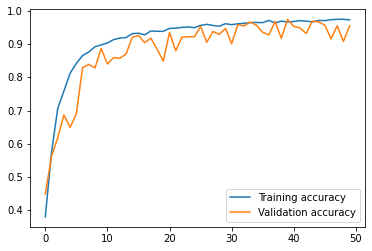

In [28]:
plt.plot(accuracy,label='Training accuracy')
plt.plot(val_accuracy,label='Validation accuracy')
plt.legend()
plt.show()

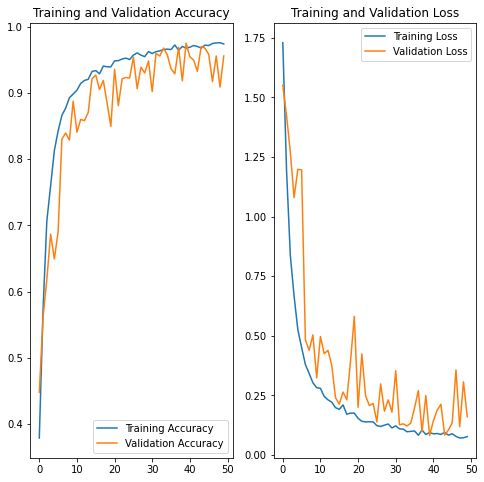

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), accuracy, label='Training Accuracy')
plt.plot(range(50), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Early_blight
predicted label: Tomato_Early_blight


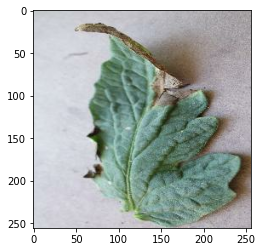

In [17]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

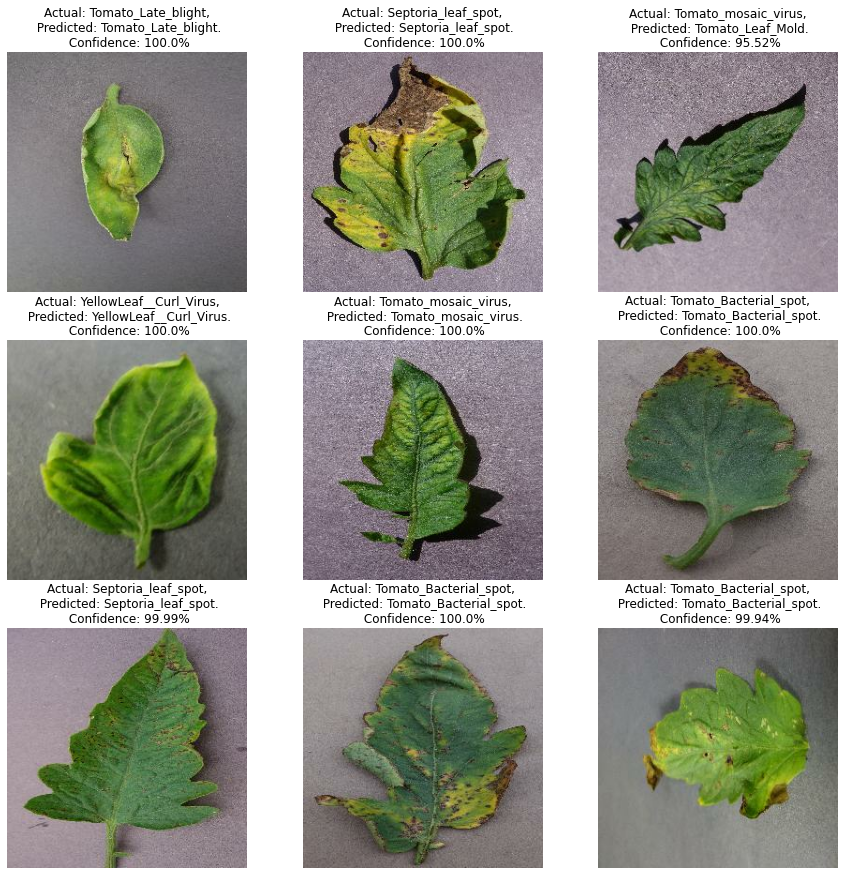

In [19]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [20]:
import os
model_version=max([int(i) for i in os.listdir("D:/projects/tomato/saved_models") + [0]])+1
model.save(f"D:/projects/tomato/saved_models/{model_version}")

INFO:tensorflow:Assets written to: D:/projects/tomato/saved_models/3\assets


In [7]:
model = tf.keras.models.load_model('./saved_models/1')

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)       

In [10]:
for layer in model.layers:
    layer.trainaqble = False

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)       

In [1]:
tensorflow.__version__

NameError: name 'tensorflow' is not defined